In [32]:

# TODO: Top minters
# TODO: How does minting value change over time?
# TODO: generalize minting_range() and owning_range() functions
    ## instead of columns names, use indexes

In [33]:
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import nfts.dataset

from nft_analysis_functions import range_analysis

In [34]:
dirname = os.path.dirname(os.path.abspath("__file__"))
DATASET_PATH = os.path.join(dirname, "nfts.sqlite")
ds = nfts.dataset.FromSQLite(DATASET_PATH)

mints_df = ds.load_dataframe("mints")
mints_df.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,6c6d226e-2096-4b50-ac3f-f7078ca3a0c2,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3223,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
1,263c923f-4db9-4d81-a547-27e1fe5ec405,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5077,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
2,8baa8502-42f9-453e-824a-ad504045c9c5,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5070,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
3,364ee658-ff31-4d0a-a7a7-60d3d7822772,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3757,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
4,58d3adc3-03d2-4e7b-b02c-47957c1f5752,0xd44be17c0298717ce001843069b0a2ca08b577fa2b33...,12936414,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,3252202771441387673917605047769619801375983664...,0x0000000000000000000000000000000000000000,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.251726e+15,1627776925


# Mints per Contract

array([[<AxesSubplot:title={'center':'num_nfts'}>]], dtype=object)

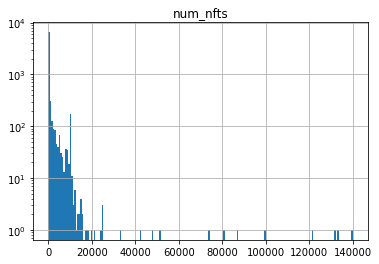

In [35]:
# nfts minted per contract (address)

mints_per_contract_df = mints_df.groupby('nft_address', as_index=False).size().rename(columns={'size':'num_nfts'})
mints_per_contract_df.hist('num_nfts', bins=200, log=True)

In [36]:
mints_per_contract_df.head()

,nft_address,num_nfts
0,0x00000000000b7F8E8E8Ad148f9d53303Bfe20796,29
1,0x000000000437b3CCE2530936156388Bff5578FC3,129
2,0x00000000fFfD97acDc8C5585C818F6b0f946C0eD,23
3,0x000000873EE8C0bE5B00D4b16723519e728A7420,3
4,0x0000009FC3Fea00F2e750632d49E2AfD96878F2a,1


In [37]:
mints_per_contract_df.quantile(q = np.arange(0.1, 1.1, 0.1))

,num_nfts
0.1,1.0
0.2,2.0
0.3,3.0
0.4,7.0
0.5,15.0
0.6,36.0
0.7,100.0
0.8,315.8
0.9,1718.6
1.0,139894.0


In [38]:
# addresses with more than 100 nfts 
top_minting_addresses_df = mints_per_contract_df[mints_per_contract_df['num_nfts']>=100]
top_minting_addresses_df.head()

,nft_address,num_nfts
1,0x000000000437b3CCE2530936156388Bff5578FC3,129
6,0x00000633Df1228868270bAdB2B812E12e13fdB91,1088
8,0x000E49C87d2874431567d38FF9548890aB39BAac,6650
9,0x001B4b85192aa034bff1524f181e3a7060e0dC30,112
17,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,10000


In [39]:
top_minting_addresses_df.count()

nft_address    2357
num_nfts       2357
dtype: int64

# NFTs minted per address

In [40]:
# mints from top addresses only
relevant_mints_df = mints_df[mints_df['nft_address'].isin(top_minting_addresses_df['nft_address'])]
relevant_mints_df.head()

,event_id,transaction_hash,block_number,nft_address,token_id,from_address,to_address,transaction_value,timestamp
0,6c6d226e-2096-4b50-ac3f-f7078ca3a0c2,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3223,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
1,263c923f-4db9-4d81-a547-27e1fe5ec405,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5077,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
2,8baa8502-42f9-453e-824a-ad504045c9c5,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,5070,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
3,364ee658-ff31-4d0a-a7a7-60d3d7822772,0xe47ac62111db3a6de2957394944501feb7d55cbef00a...,12936415,0x02AA731631c6D7F8241d74F906f5b51724Ab98F8,3757,0x0000000000000000000000000000000000000000,0x8D745Fb3311cC86ED52C177dA0d039C1862F3e13,0.000000e+00,1627776933
4,58d3adc3-03d2-4e7b-b02c-47957c1f5752,0xd44be17c0298717ce001843069b0a2ca08b577fa2b33...,12936414,0x57f1887a8BF19b14fC0dF6Fd9B2acc9Af147eA85,3252202771441387673917605047769619801375983664...,0x0000000000000000000000000000000000000000,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,2.251726e+15,1627776925


In [41]:
# mint receivers per address
mint_receivers_df = relevant_mints_df.groupby('nft_address', as_index=False)['to_address'].nunique().rename(columns={'to_address':'num_receivers'})
mint_receivers_df = mint_receivers_df.merge(mints_per_contract_df, on='nft_address')
mint_receivers_df.head()

,nft_address,num_receivers,num_nfts
0,0x000000000437b3CCE2530936156388Bff5578FC3,26,129
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,155,1088
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1615,6650
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1,112
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1292,10000


In [42]:
mint_receivers_df.count()

nft_address      2357
num_receivers    2357
num_nfts         2357
dtype: int64

array([[<AxesSubplot:title={'center':'num_nfts'}>]], dtype=object)

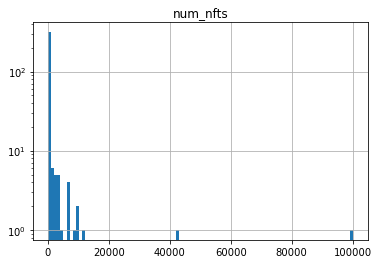

In [43]:
mint_receivers_df[mint_receivers_df['num_receivers'] == 1].hist('num_nfts', bins=100, log=True)

array([[<AxesSubplot:title={'center':'weighted_num_receivers'}>]],
      dtype=object)

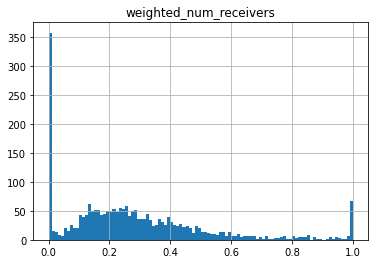

In [44]:
mint_receivers_df['weighted_num_receivers'] = mint_receivers_df['num_receivers'] / mint_receivers_df['num_nfts']
mint_receivers_df.hist('weighted_num_receivers', bins=100)

# Top Minters

In [45]:
top_minters_df = mints_df.groupby(['to_address'], as_index=False).size().rename(columns={'to_address':'minter', 'size':'num_mints'})
top_minters_df.sort_values('num_mints', inplace=True, ascending=False)

top_minters_df.head(10)

,minter,num_mints
79304,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,139631
99431,0x327305A797d92a39cEe1a225D7E2A1cC42B1a8fA,101329
5853,0x02E4103b8A3c55AcDDF298311a9928f9Fe27822C,99999
378771,0xE052113bd7D7700d623414a0a4585BCaE754E9d5,59770
297374,0x96bEE49d3386d674bF4E956D9B3ce61b9540409D,42456
344266,0xBa0d01220a7CeA942596123102535F800f558763,33701
366238,0xD387A6E4e84a6C86bd90C158C6028A58CC8Ac459,13638
462786,0xd5a9C4a92dDE274e126f82b215Fccb511147Cd8e,13521
221,0x0008d343091EF8BD3EFA730F6aAE5A26a285C7a2,12151
75210,0x262492D7278c07444972f5AB4fBdDE10D4ca8BeA,10430


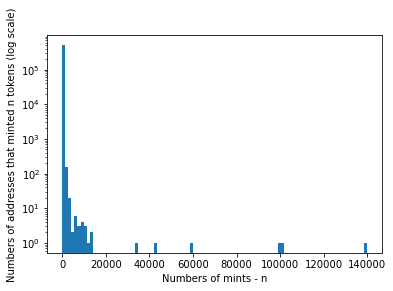

In [46]:
plt.xlabel('Numbers of mints - n')
plt.ylabel('Numbers of addresses that minted n tokens (log scale)')
_, _, _ = plt.hist(top_minters_df['num_mints'], bins=100, log=True)

In [47]:
minting_distribution_list = []

# all minters
minting_distribution_list.append(range_analysis(top_minters_df, 1))
# minters with more than 1 token
minting_distribution_list.append(range_analysis(top_minters_df, 2))

for i in [1, 500, 1000, 5000, 10000]:
    minting_distribution_list.append(range_analysis(top_minters_df, 1, i))

# minters with more than 20000 token
minting_distribution_list.append(range_analysis(top_minters_df, 20000))

ownership_distribution_df = pd.DataFrame(minting_distribution_list, columns=['NFTs minted', 'number of minters', '% of minters', 'number of mints', '% of mints'])
ownership_distribution_df

,NFTs minted,number of minters,% of minters,number of mints,% of mints
0,1 <= n,504004,100.0%,6667282,100.0%
1,2 <= n,294074,58.35%,6457352,96.85%
2,n = 1,209930,41.65%,209930,3.15%
3,1 <= n <= 500,502787,99.76%,4852937,72.79%
4,1 <= n <= 1000,503580,99.92%,5396384,80.94%
5,1 <= n <= 5000,503977,99.99%,6013547,90.19%
6,1 <= n <= 10000,503993,100.0%,6130647,91.95%
7,20000 <= n,6,0.0%,476886,7.15%


# Minting period

In [48]:
# for each address, it contains timestamp of first and last minting (+ difference in seconds)
minting_period_df = relevant_mints_df.groupby('nft_address', as_index=False).agg(min_timestamp=pd.NamedAgg(column='timestamp', aggfunc="min"), 
                                                                                    max_timestamp=pd.NamedAgg(column='timestamp', aggfunc="max"))

minting_period_df['duration'] = minting_period_df['max_timestamp'] - minting_period_df['min_timestamp']
minting_period_df.head()

,nft_address,min_timestamp,max_timestamp,duration
0,0x000000000437b3CCE2530936156388Bff5578FC3,1626506862,1632425761,5918899
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,1630760998,1631346316,585318
2,0x000E49C87d2874431567d38FF9548890aB39BAac,1631895759,1632586360,690601
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,1620428643,1620429463,820
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,1627076574,1627079304,2730


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

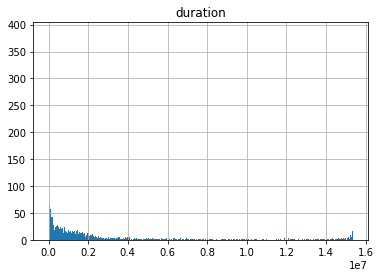

In [49]:
minting_period_df.hist('duration', bins=500)

In [50]:
print(f"Number of days per x step: {0.2 * 1e7 / (24 * 3600)}")

Number of days per x step: 23.14814814814815


In [51]:
# merge of minting period and mint receivers
duration_receivers_df = minting_period_df.merge(mint_receivers_df, on='nft_address')
duration_receivers_df.drop(['min_timestamp', 'max_timestamp'], axis=1, inplace=True)

duration_receivers_df.head()

,nft_address,duration,num_receivers,num_nfts,weighted_num_receivers
0,0x000000000437b3CCE2530936156388Bff5578FC3,5918899,26,129,0.201550
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,585318,155,1088,0.142463
2,0x000E49C87d2874431567d38FF9548890aB39BAac,690601,1615,6650,0.242857
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,820,1,112,0.008929
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,2730,1292,10000,0.129200


<AxesSubplot:xlabel='duration', ylabel='num_receivers'>

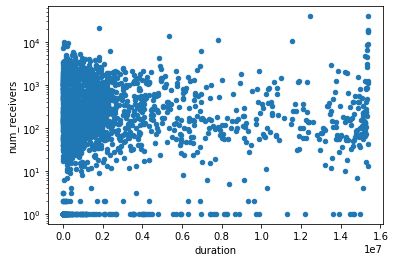

In [52]:
duration_receivers_df.plot.scatter('duration', 'num_receivers', logy=True)

# Minting Cost

In [53]:

minting_costs_df = relevant_mints_df.groupby('nft_address', as_index=False).agg(mean_cost=pd.NamedAgg(column='transaction_value', aggfunc="mean"),
                     min_cost=pd.NamedAgg(column='transaction_value', aggfunc="min"), max_cost=pd.NamedAgg(column='transaction_value', aggfunc="max"))

minting_costs_df['mean_cost_eth'] = minting_costs_df['mean_cost'] / (10**18)
minting_costs_df['min_cost_eth'] = minting_costs_df['min_cost'] / (10**18)
minting_costs_df['max_cost_eth'] = minting_costs_df['max_cost'] / (10**18)

minting_costs_df.drop(['mean_cost', 'min_cost', 'max_cost'], axis=1, inplace=True)

minting_costs_df.head()

,nft_address,mean_cost_eth,min_cost_eth,max_cost_eth
0,0x000000000437b3CCE2530936156388Bff5578FC3,0.000000,0.0,0.00
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,0.010285,0.0,0.30
2,0x000E49C87d2874431567d38FF9548890aB39BAac,0.322466,0.0,1.60
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,0.000000,0.0,0.00
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,0.734243,0.0,1.05


In [54]:
# contains info about: costs, duration and receivers
costs_receivers_df = minting_costs_df.merge(duration_receivers_df, on="nft_address")

costs_receivers_df.head()

,nft_address,mean_cost_eth,min_cost_eth,max_cost_eth,duration,num_receivers,num_nfts,weighted_num_receivers
0,0x000000000437b3CCE2530936156388Bff5578FC3,0.000000,0.0,0.00,5918899,26,129,0.201550
1,0x00000633Df1228868270bAdB2B812E12e13fdB91,0.010285,0.0,0.30,585318,155,1088,0.142463
2,0x000E49C87d2874431567d38FF9548890aB39BAac,0.322466,0.0,1.60,690601,1615,6650,0.242857
3,0x001B4b85192aa034bff1524f181e3a7060e0dC30,0.000000,0.0,0.00,820,1,112,0.008929
4,0x004f5683e183908D0f6b688239e3e2D5bbb066CA,0.734243,0.0,1.05,2730,1292,10000,0.129200


<AxesSubplot:xlabel='num_receivers', ylabel='mean_cost_eth'>

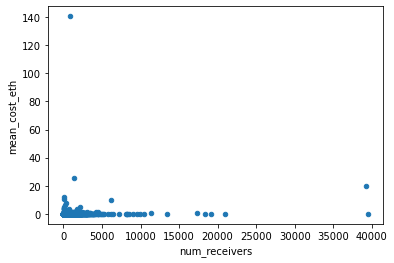

In [55]:
costs_receivers_df.plot.scatter('num_receivers', 'mean_cost_eth')

In [56]:
costs_receivers_df[costs_receivers_df['mean_cost_eth'] > 100]

,nft_address,mean_cost_eth,min_cost_eth,max_cost_eth,duration,num_receivers,num_nfts,weighted_num_receivers
805,0x58A3c68e2D3aAf316239c003779F71aCb870Ee47,140.396493,0.0,15000.647964,15265750,831,1714,0.484831


<AxesSubplot:xlabel='num_receivers', ylabel='mean_cost_eth'>

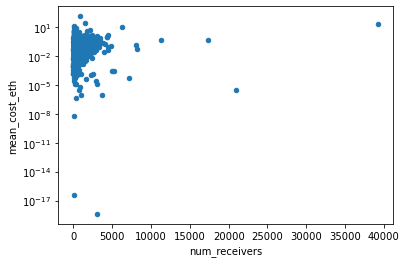

In [57]:
costs_receivers_df[costs_receivers_df['max_cost_eth'] > 0].plot.scatter('num_receivers', 'mean_cost_eth', logy=True)

## Minting cost change over time

# Conclusions

Things we can infer:

1. Most NFTs mint to a relatively small number of receivers.
1. Relatively few NFTs mint to a single receiver.
1. Most NFTs mint their complete supply very soon after launch (within 24 hours).
1. Most Ethereum NFTs charge ETH for minting.

This suggests that most NFT projects either:

1. Maintain a whitelist of addresses that are allowed to mint their tokens and each mint operation is carried out by a member of the whitelist in exchange for ETH (or other value).
1. Allow any address to mint value, but place an upper limit to the number of tokens that can be minted per address.

We do not have enough data to determine how many of these NFTs adopt each strategy, but the second strategy seems unlikely because of how easy it is for a single individual or group to create multiple Ethereum addresses to claim tokens from.